In [9]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

### 1
#### a

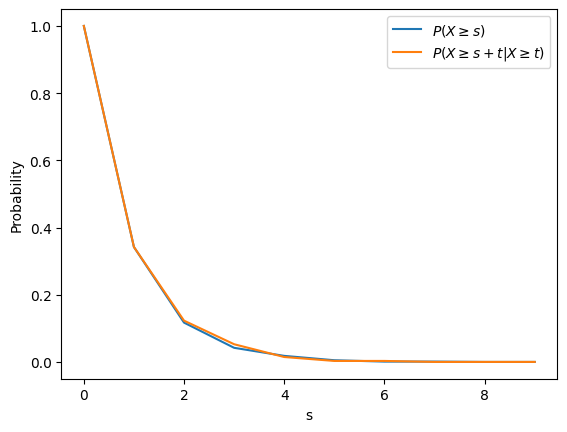

In [10]:
n = 1000
s = np.random.exponential(scale=1.0, size=n)
p = []
p_condi = []
t = 1
for i in range(10):
    p.append(np.sum(s>=i)/n)
    p_condi.append(np.sum(s>=(i+t))/np.sum(s>=t))
plt.plot(list(range(10)), p, label=r'$P(X\geq s)$')
plt.plot(list(range(10)), p_condi, label=r'$P(X\geq s+t|X\geq t)$')
plt.legend()
plt.xlabel('s')
plt.ylabel('Probability')
plt.show()

### b

$$P(X\ge t+s|X\ge t)=\frac{P(X\ge t+s)}{P(X\ge t)}$$
$$\frac{e^{-\lambda(t+s-1)}}{e^{-\lambda(t-1)}}$$
$$=e^{-\lambda (s-1)}$$
$$=1-(1-e^{-\lambda(s-1)})$$
$$=P(X\ge s)$$

## 2
### a

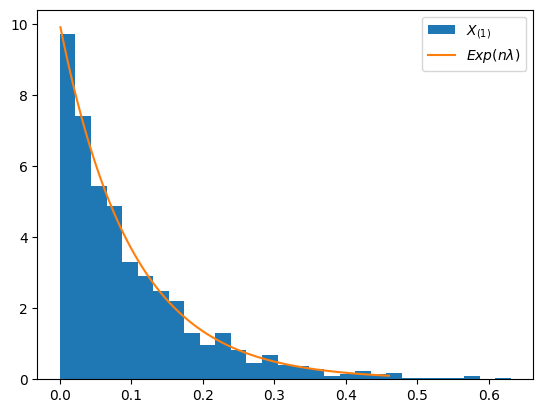

In [11]:
n = 10
s = []
for i in range(1000):
    s.append(np.min(np.random.exponential(scale=1.0, size=n)))
plt.hist(s, density=True, bins='auto', label=r'$X_{(1)}$')
x = np.linspace(sp.stats.expon.ppf(0.01,scale=1/n),
                sp.stats.expon.ppf(0.99,scale=1/n), 100)
plt.plot(x,sp.stats.expon.pdf(x,scale=1/n), label=r'$Exp(n \lambda )$')
plt.legend()
plt.show()

### b

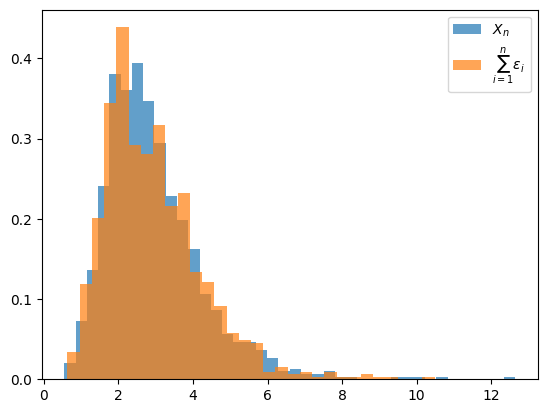

In [12]:
n = 10
s = []
v = []
for i in range(1000):
    s.append(np.max(np.random.exponential(scale=1.0, size=n)))
    v.append(np.sum(list(map(lambda x: np.random.exponential(scale=1/x,size=1), list(range(1,n+1))))))
plt.hist(s, density=True, bins='auto', label=r'$X_{n}$', alpha=0.7)
plt.hist(v, density=True, bins='auto', label=r'$\sum_{i=1}^{n}\epsilon_{i}$', alpha=0.7)
plt.legend()
plt.show()

## 3
### a

In [13]:
lmd = 1.0
t_max = 10
t = 0
seq = []
while 1:
    seq.append(t)
    t += np.random.exponential(scale=1/lmd, size=1)[0]
    if t > t_max:
        break
seq

[0,
 0.6202151412291979,
 1.1263906762901388,
 6.1583937697320845,
 6.576788566291856,
 7.250843036657262,
 7.28425167116081,
 9.475425264270354]

### b

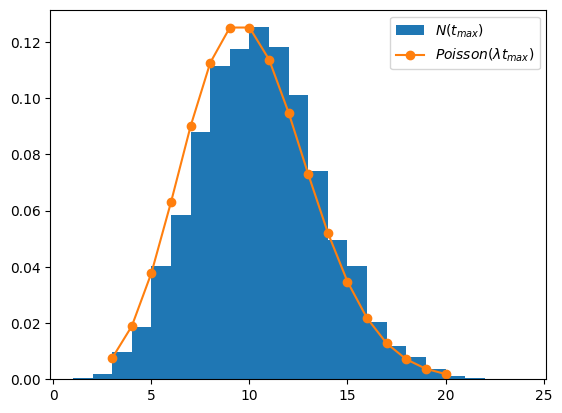

In [14]:
lmd = 1.0
t_max = 10
N = []
mu = lmd * t_max
for i in range(5000):
    t = 0
    seq = []
    while 1:
        seq.append(t)
        t += np.random.exponential(scale=1/lmd, size=1)[0]
        if t > t_max:
            break
    N.append(len(seq)-1)
plt.hist(N, density=True, bins=23, label=r'$N(t_{max})$')
x = np.arange(sp.stats.poisson.ppf(0.01,mu),
                sp.stats.poisson.ppf(0.999,mu))
plt.plot(x,sp.stats.poisson.pmf(x,mu), '-o', label=r'$Poisson(\lambda t_{max})$')
plt.legend()
plt.show()

## 4
### a

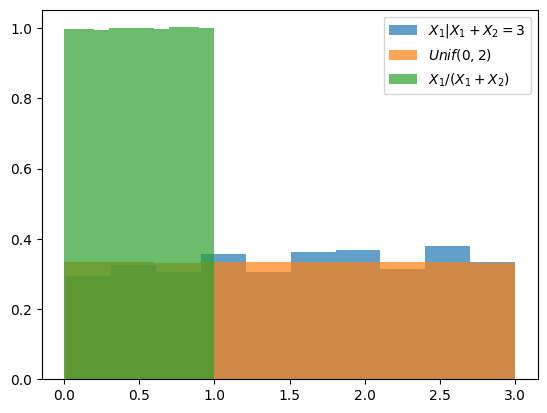

In [15]:
a = 3
n = 1000000
X1 = np.random.exponential(scale=1.0, size=n)
X2 = np.random.exponential(scale=1.0, size=n)
s_n = np.random.uniform(low=0,high=3,size=n)
s = X1[np.isclose(X1+X2,a,rtol=1e-3)]
c = X1/(X1+X2)
plt.hist(s, density=True, alpha=0.7, label=r'$X_1|X_1+X_2=3$')
plt.hist(s_n, density=True, alpha=0.7, label=r'$Unif(0,2)$')
plt.hist(c, density=True, alpha=0.7, label=r'$X_1/(X_1+X_2)$')
plt.legend()
plt.show()

The potential candidates for the distribution of $X_{1}|X_{1}+X_{2}=a$ is $Unif(0,a)$.

### b
$$f_{X_{1}|X_{1}+X_{2}=a}(x)=\frac{f_{X_{1}}(x)f_{X_{2}}(a-x)}{f_{X_{1}+X_{2}=a}}$$
$$\propto f_{X_{1}}(x)f_{X_{2}}(a-x)$$
$$=\lambda e^{-\lambda x}\lambda e^{-\lambda (a-x)}\mathbf{1}\{0\le x\le a\}$$
$$=\lambda^{2}e^{-\lambda a}\mathbf{1}\{0\le x\le a\}$$
$X_{1}|X_{1}+X_{2}=a$ follows distribution $Unif(0,a)$.

### c
See the plot in (a).

$X_{1}/(X_{1}+X_{2})$ follows a uniform distribution $Unif(0,1)$.

The distribution of $X_{1}|X_{1}+X_{2}=a$ is $Unif(0,a)$.